# Final Capstone
#### Evelyn Davis

1. State your question. What is it that you are curious about? What are you looking for in the data?

Our mission in the AETC is recruit, train, and educate airmen to deliver airpower for America. In this capstone, I am interested with the effect factors of the student academic preformance. I am looking for the relationship between attributes(students' demographic features, academic background, and behavioral features) and grades.

#### MVP: Build a prediction model to predict student academic performance base on given attributes of students.
#### MVP+: Use logistic regression classification, and KNN classification to train and test on the data, find test accuracy.
#### MVP++: Use Confusion Matrix to compare different classifications.


In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

### Explore dataframe

In [237]:
data = pd.read_csv('data.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [238]:
data = data.rename(columns={'gender': 'Gender', 'raisedhands': 'RaisedHands'})
data.head()


,Gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   RaisedHands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [240]:
data.describe()

,RaisedHands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [241]:
print(data.shape)

(480, 17)


### There are 16 columns in the dataset, and four of them are numerical, the rest of them are nominal. There isn't any Nan values.

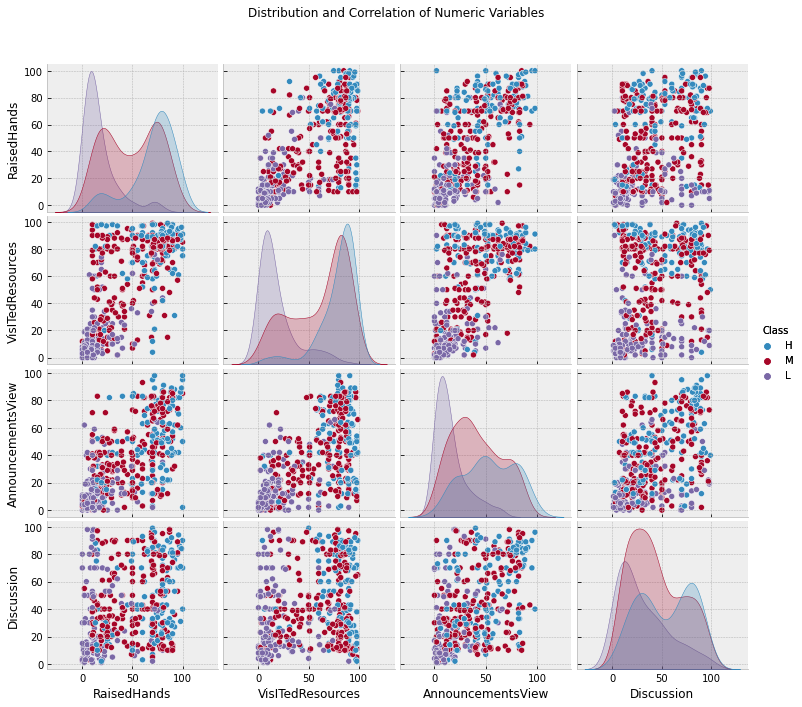

In [242]:
pp = sns.pairplot(data,hue='Class', hue_order=['H', 'M', 'L'])
pp.add_legend()
pp.fig.suptitle('Distribution and Correlation of Numeric Variables')
pp.fig.subplots_adjust(top=0.9);

#### People in the L class have very low participation rates as we see the distribution to be right skewed.
#### People in the H class have high participation rates and utilises the resources on the platform
#### People in the M class are widely distrubuted. As M class represents majority of the dataset, that could be the reason why it's evenly distributed.

#### Class:

##### Low-Level: interval includes values from 0 to 69,
##### Middle-Level: interval includes values from 70 to 89,
##### High-Level: interval includes values from 90-100.

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

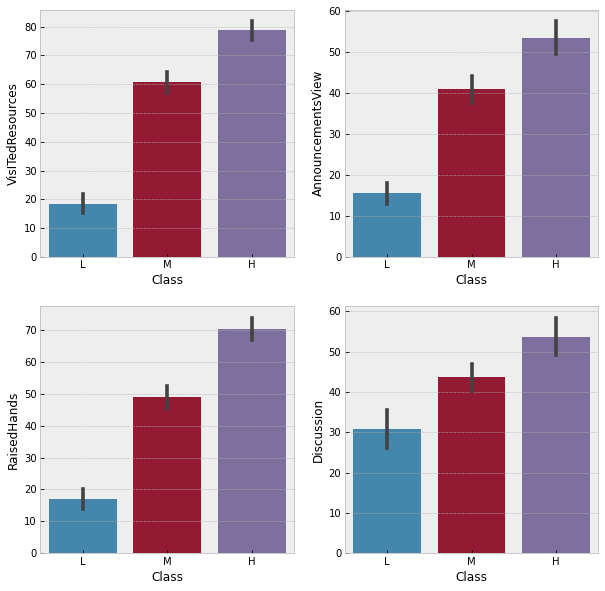

In [243]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='RaisedHands', data=data, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axarr[1,1])

In [244]:
# Let's to find out success of student,add a new column including weighted variables.So if the number of raises a student's hand is 20, 

data["weighted_rh"]=pd.cut(x=data["RaisedHands"], bins=[-1,25,50,75,100], labels=[2,3,4,5])
data["weighted_vr"]=pd.cut(x=data["VisITedResources"], bins=[-1,25,50,75,100], labels=[2,3,4,5])
data["weighted_av"]=pd.cut(x=data["AnnouncementsView"], bins=[-1,25,50,75,100], labels=[2,3,4,5])
data["weighted_dis"]=pd.cut(x=data["Discussion"], bins=[-1,25,50,75,100], labels=[2,3,4,5])

# All weighted variables are category variable type so we should change the type to 'int64'

data["weighted_rh"]=data["weighted_rh"].astype('int64')
data["weighted_vr"]=data["weighted_vr"].astype('int64')
data["weighted_av"]=data["weighted_av"].astype('int64')
data["weighted_dis"]=data["weighted_dis"].astype('int64')

# For each student add a new column called "studentsucces"

data["StudentSuccess"]=((data["RaisedHands"]*data["weighted_rh"])+(data["VisITedResources"]*data["weighted_vr"])+
                      (data["AnnouncementsView"]*data["weighted_av"])+(data["Discussion"]*data["weighted_dis"]))/(data["weighted_rh"]+data["weighted_vr"]+data["weighted_av"]+data["weighted_dis"])

del data["weighted_rh"]
del data["weighted_vr"]
del data["weighted_av"]
del data["weighted_dis"]

data.head()

,Gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,StudentSuccess
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,13.250000
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,17.000000
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,13.777778
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,25.500000
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,40.363636


In [245]:
data.describe()

,RaisedHands,VisITedResources,AnnouncementsView,Discussion,StudentSuccess
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333,50.055608
std,30.779223,33.080007,26.611244,27.637735,23.592534
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000,29.434091
50%,50.000000,65.000000,33.000000,39.000000,53.594156
75%,75.000000,84.000000,58.000000,70.000000,69.441176
max,100.000000,99.000000,98.000000,99.000000,92.000000


In [246]:
def visualize_plot(col1, col2, i):
    plt.subplot(2,3,i)
    plt.title("Student Success for {}".format(col2))
    sns.barplot(data[col2],y=data[col1], data=data, palette="ocean")
    plt.xticks(rotation=45)
    plt.ylim(0,85)

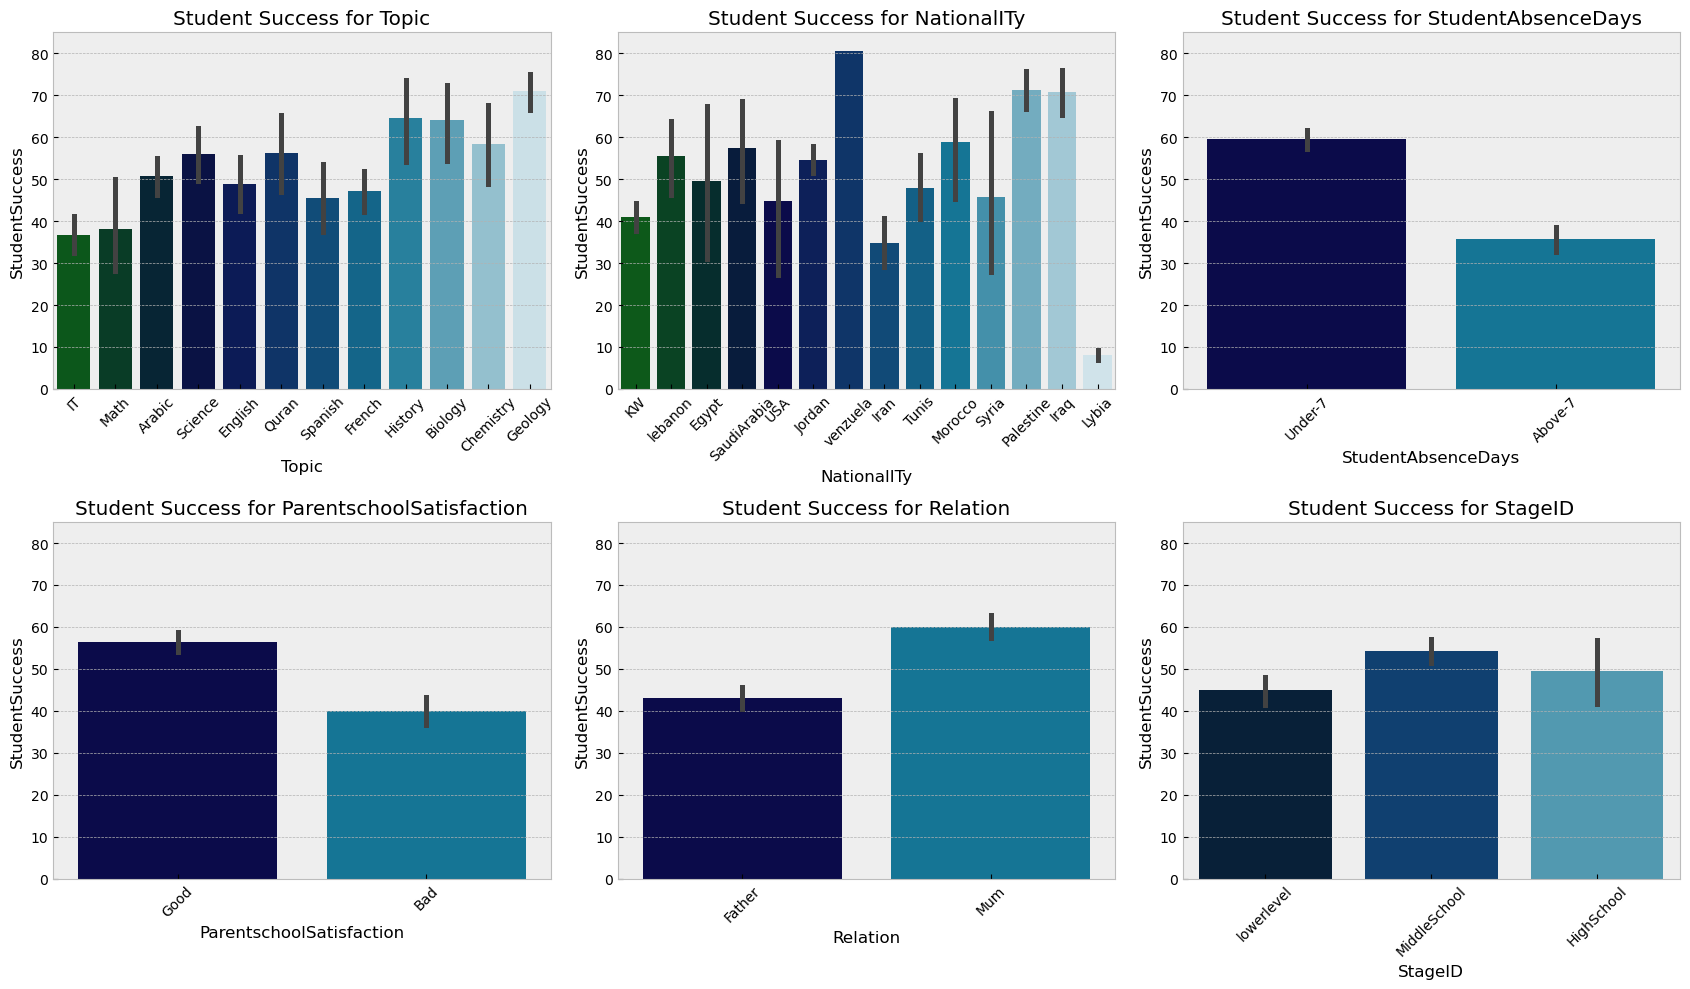

In [247]:
plt.figure(figsize=(17,10), dpi=100)
visualize_plot("StudentSuccess", 'Topic', 1)
visualize_plot("StudentSuccess", 'NationalITy', 2)
visualize_plot("StudentSuccess", 'StudentAbsenceDays', 3)
visualize_plot("StudentSuccess", 'ParentschoolSatisfaction', 4)
visualize_plot("StudentSuccess", 'Relation', 5)
visualize_plot("StudentSuccess", 'StageID', 6)
plt.tight_layout()
plt.show()


### Outlier Values

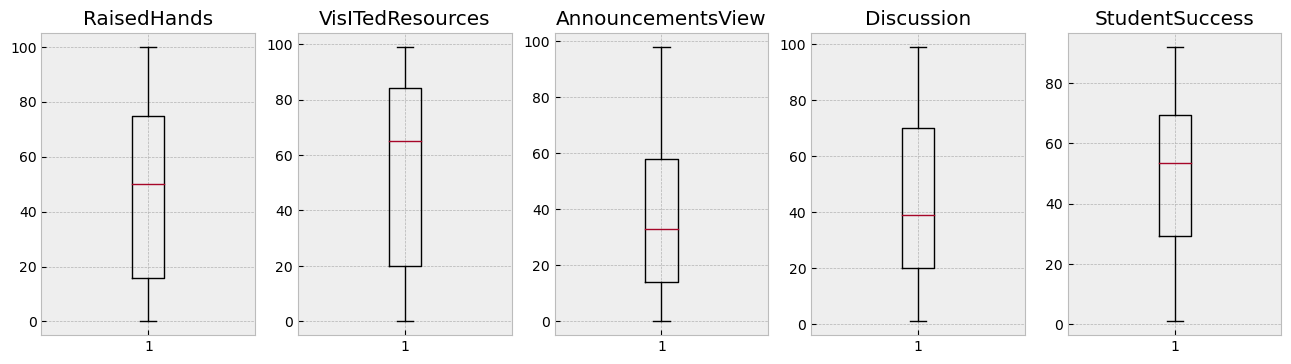

In [248]:
plt.figure(figsize=(16,4), dpi=100)

column=["RaisedHands","VisITedResources","AnnouncementsView","Discussion","StudentSuccess"]
for i in range(len(column)):
    plt.subplot(1,5,i+1)
    plt.title("{}".format(column[i]))
    plt.boxplot(data[column[i]], whis=1.5 )
plt.show()  

<Figure size 1800x500 with 0 Axes>

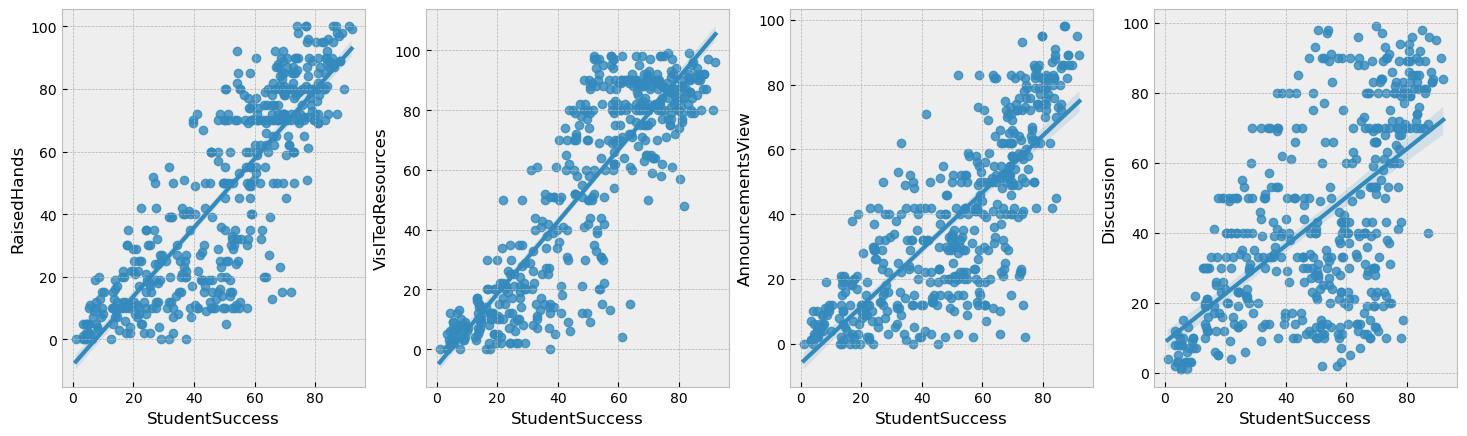

In [249]:
plt.figure(figsize=(18,5),dpi=100)

column=["RaisedHands","VisITedResources","AnnouncementsView","Discussion"]

plt.figure(figsize=(18,5), dpi=100)
for i in range(len(column)):
    plt.subplot(1,4,i+1)
    sns.regplot(y=data[column[i]], x=data["StudentSuccess"], data=data)

plt.show()

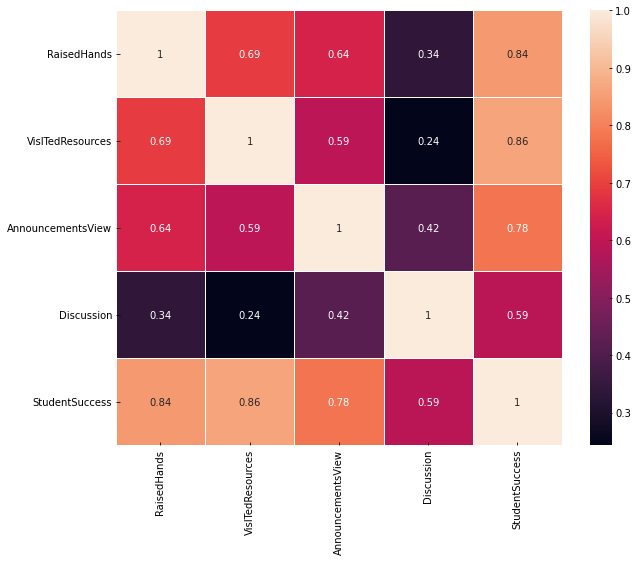

In [250]:
correlation=data[["RaisedHands","VisITedResources","AnnouncementsView","Discussion","StudentSuccess"]].corr()
sns.heatmap(correlation, annot=True, linewidths=0.5)
plt.show()

In [251]:
X = data[["RaisedHands","VisITedResources","AnnouncementsView","Discussion"]]
y = data["StudentSuccess"]

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [253]:
pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [254]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

### Linear Regression

In [255]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
RaisedHands,6.637684
VisITedResources,11.212066
AnnouncementsView,4.709670
Discussion,6.683364


<AxesSubplot:xlabel='True Values', ylabel='Predicted Values'>

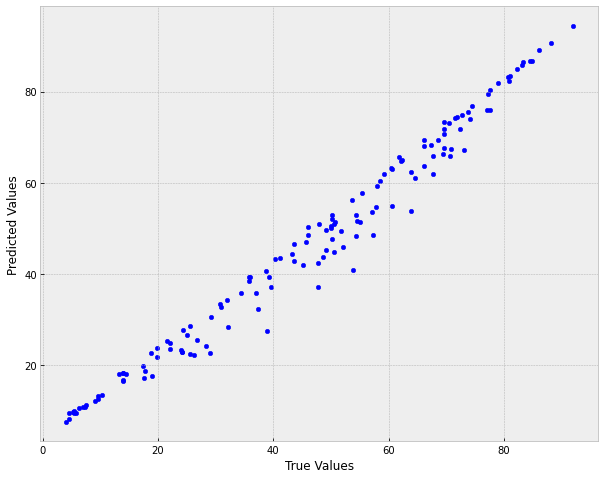

In [256]:
pred = lin_reg.predict(X_test)
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).plot.scatter(x='True Values', y='Predicted Values')

<AxesSubplot:ylabel='Density'>

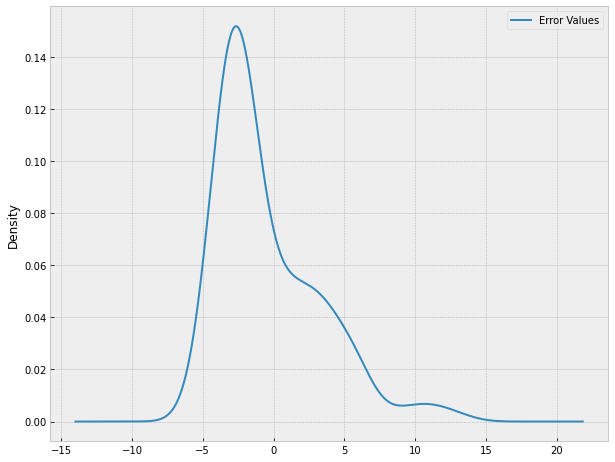

In [257]:
pd.DataFrame({'Error Values': (y_test - pred)}).plot.kde()

In [258]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:')
print_evaluate(y_test, test_pred)
print('Train set evaluation:')
print_evaluate(y_train, train_pred)

Test set evaluation:
MAE: 3.03715617086481
MSE: 13.255694831417221
RMSE: 3.640837105861401
R2 Square 0.9770967382032691
__________________________________
Train set evaluation:
MAE: 2.7980393957844445
MSE: 13.02629383325512
RMSE: 3.6091957321895305
R2 Square 0.9756403380684348
__________________________________


In [259]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3.037156,13.255695,3.640837,0.977097,0.962447


### Ridge Regression

In [260]:
model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.954111832273671
MSE: 24.993394752998444
RMSE: 4.999339431664792
R2 Square 0.956816276287513
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.5697760449962797
MSE: 21.06144794745694
RMSE: 4.589275318332617
R2 Square 0.9606142961031992
__________________________________


In [261]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3.037156,13.255695,3.640837,0.977097,0.962447
1,Ridge Regression,3.954112,24.993395,4.999339,0.956816,0.962447


### Lasso Regression

In [262]:
model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.0486966489893326
MSE: 13.407763317361194
RMSE: 3.661661278349104
R2 Square 0.9768339934442126
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.7905147348297548
MSE: 13.043625595924349
RMSE: 3.6115959901301737
R2 Square 0.9756079270170103
__________________________________


In [263]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3.037156,13.255695,3.640837,0.977097,0.962447
1,Ridge Regression,3.954112,24.993395,4.999339,0.956816,0.962447
2,Lasso Regression,3.048697,13.407763,3.661661,0.976834,0.962459


### Logistic Regression Classification

#### All Class

In [264]:
data_new = data.loc[:,["RaisedHands","VisITedResources","AnnouncementsView","Discussion", 'Class']]
data_new.head()

,RaisedHands,VisITedResources,AnnouncementsView,Discussion,Class
0,15,16,2,20,M
1,20,20,3,25,M
2,10,7,0,30,L
3,30,25,5,35,L
4,40,50,12,50,M


In [265]:
y=data_new['Class']
x_data = data_new[["RaisedHands","VisITedResources","AnnouncementsView","Discussion"]]

In [266]:
X=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=52)

In [269]:
#fit
lr=LogisticRegression(C = 0.5, max_iter = 500)
model_lr= lr.fit(x_train,y_train)
pred_lr = model_lr.predict(x_test)

#Coef
print(lr.intercept_, lr.coef_)

#accuracy
print("test accuracy is {}".format(lr.score(x_test,y_test)))

[-2.29824946  2.12787724  0.17037222] [[ 1.67102359  1.76252865  0.64124397  0.47412333]
 [-1.82144942 -2.18501044 -1.26640741 -0.55223926]
 [ 0.15042583  0.42248179  0.62516343  0.07811593]]
test accuracy is 0.7083333333333334


In [270]:
print('Classification Report of Logistic Regression')
print()
print(classification_report(y_test, pred_lr, target_names=['High Class', 'Middle Class', "Low Class"]))
print('==========================================================')
print('Confusion Matrix of Logistic Regression')
print()
print(pd.DataFrame(confusion_matrix(y_test,pred_lr)))

Classification Report of Logistic Regression

              precision    recall  f1-score   support

  High Class       0.83      0.69      0.75        35
Middle Class       0.67      0.82      0.73        22
   Low Class       0.65      0.67      0.66        39

    accuracy                           0.71        96
   macro avg       0.71      0.72      0.71        96
weighted avg       0.72      0.71      0.71        96

Confusion Matrix of Logistic Regression

    0   1   2
0  24   1  10
1   0  18   4
2   5   8  26


### Change Class to High and Non-High (Binary)

In [271]:
data_new.Class=[1 if i=='H' else 0 for i in data_new.Class]
y=data_new['Class']
x_data = data_new[["RaisedHands","VisITedResources","AnnouncementsView","Discussion"]]
X=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=52)
#fit
lr=LogisticRegression(C = 0.5, max_iter = 500)
model_lr= lr.fit(x_train,y_train)
pred_lr = model_lr.predict(x_test)

#Coef
print(lr.intercept_, lr.coef_)

#accuracy
print("test accuracy is {}".format(lr.score(x_test,y_test)))

[-3.51557039] [[1.79972018 1.98401777 0.4135471  0.44634279]]
test accuracy is 0.8333333333333334


In [272]:
print('Classification Report of Logistic Regression')
print()
print(classification_report(y_test, pred_lr, target_names=['High Class', 'Non-High Class']))
print('==========================================================')
print('Confusion Matrix of Logistic Regression')
print()
print(pd.DataFrame(confusion_matrix(y_test,pred_lr)))

Classification Report of Logistic Regression

                precision    recall  f1-score   support

    High Class       0.83      0.93      0.88        61
Non-High Class       0.85      0.66      0.74        35

      accuracy                           0.83        96
     macro avg       0.84      0.80      0.81        96
  weighted avg       0.84      0.83      0.83        96

Confusion Matrix of Logistic Regression

    0   1
0  57   4
1  12  23


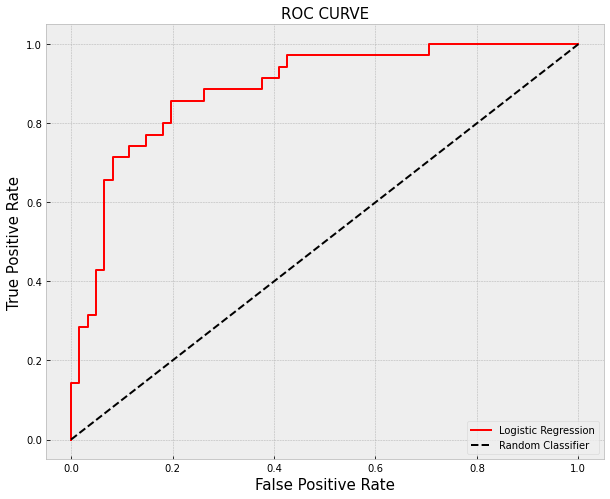

In [273]:
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("False Positive Rate", fontsize = 15)
plt.ylabel("True Positive Rate", fontsize = 15)

prob = model_lr.predict_proba(x_test)
prob_positive = prob[:,1]
fpr, tpr, threshold = roc_curve(y_test, prob_positive)
plt.plot(fpr, tpr, color = 'red', label = 'Logistic Regression')
plt.plot([0,1],[0,1], linestyle = '--', color = 'black', label = 'Random Classifier')
plt.gca().legend(loc = 'lower right', frameon = True)
plt.show()

In [274]:
roc_auc_score(y_test, prob_positive)

0.8852459016393442

#### There is a 88.5% chance that the logistic regression model will be able to distinguish between High class and non-high class.

## T-test

In [275]:
# If p value is less than 0.05, we can accept HA, on the other hand we can say "there is an important difference between the two categorical variables
print("Raised Hands & Student Success:","\n",stats.ttest_ind(data["RaisedHands"], data["StudentSuccess"], equal_var=False),"\n")
print("Visited Resources & Student Success:","\n",stats.ttest_ind(data["VisITedResources"], data["StudentSuccess"], equal_var=False),"\n")
print("Announcement View & Student Success:","\n",stats.ttest_ind(data["AnnouncementsView"], data["StudentSuccess"], equal_var=False),"\n")
print("Discussion & Student Success:","\n",stats.ttest_ind(data["Discussion"], data["StudentSuccess"], equal_var=False))

Raised Hands & Student Success: 
 Ttest_indResult(statistic=-1.8533423563559652, pvalue=0.0641613476945868) 

Visited Resources & Student Success: 
 Ttest_indResult(statistic=2.5571179353735114, pvalue=0.010723718661050262) 

Announcement View & Student Success: 
 Ttest_indResult(statistic=-7.476904036635592, pvalue=1.7355757625021424e-13) 

Discussion & Student Success: 
 Ttest_indResult(statistic=-4.0831362470527, pvalue=4.823415949289362e-05)
